# 01. Data preprocessing

Data preprocessing is a crucial step in any kinds of omics data analysis to remove unnecessary sources of variation and make clearer heterogeneity in our interests (e.g. cell-types). We used two python packages, [_anndata_](https://anndata.readthedocs.io/en/latest/index.html) and [_scanpy_](https://scanpy.readthedocs.io/en/stable/index.html), for the preprocessing. Please find how to create an _anndata_ object out of a read count .csv file [here](https://anndata-tutorials.readthedocs.io/en/latest/getting-started.html). 

### Load an Anndata object saved in .hdf5 file for each assay
We load both single-cell RNA-seq and ATAC-seq data saved in .hdf5 files. We subset a bone marrow mononuclear single-cell multiomics dataset from GEO database [GSE194122](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE194122) taking 2,498 NK, Normoblast and ILC cells from donor1 and donor2. RNA-seq data consists of 13,431 features. In the _anndata_ object, you have to make sure that metadata information is stored in the _obs_ annotation. This will be used for batch effect correction in scMaui algorithm.

In [1]:
from anndata import read_h5ad
gex = read_h5ad("../data/GSE194122/gex.hdf5")
atac = read_h5ad("../data/GSE194122/atac.hdf5")
gex

AnnData object with n_obs × n_vars = 2498 × 13431
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

ATAC-seq data is comprised of 116,490 features. 

In [2]:
atac

AnnData object with n_obs × n_vars = 2498 × 116490
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

As mentioned, this dataset includes three different cell-tyeps: NK, Normoblast and ILC. We consider different donors as a batch effect factor. There are two donors in this dataset. 

In [3]:
gex.obs.cell_type.unique()

['NK', 'Normoblast', 'ILC']
Categories (3, object): ['NK', 'Normoblast', 'ILC']

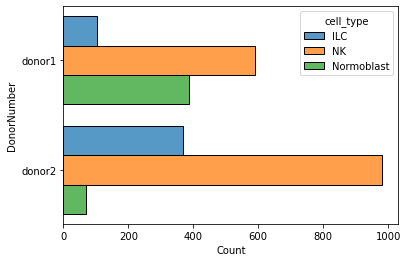

In [8]:
import seaborn as sns
sns.histplot(data=gex.obs, hue="cell_type", y="DonorNumber", multiple="dodge", shrink=0.8)

### Preprocessing omics assays

Before the preprocessing, we conduct dimionality reduction on the assay using PCA and make a UMAP plot.

In [5]:
import scanpy as sc
sc.tl.pca(gex)
sc.pp.neighbors(gex)
sc.tl.umap(gex)

<Figure size 1080x216 with 0 Axes>

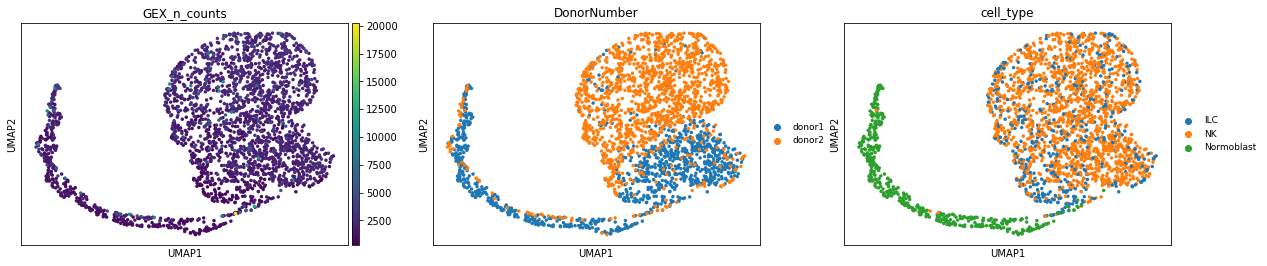

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
sc.pl.umap(gex, color=["GEX_n_counts", "DonorNumber", "cell_type"], legend_fontsize=9)
plt.show()

Without preprocessing, we can see ILC an NK cells are not distinguishable, but donor 1 and 2 are clearly separated in the plot. We normalise features by total counts in respective cells and transform the values with _log(X+1)_ function.

<Figure size 1080x216 with 0 Axes>

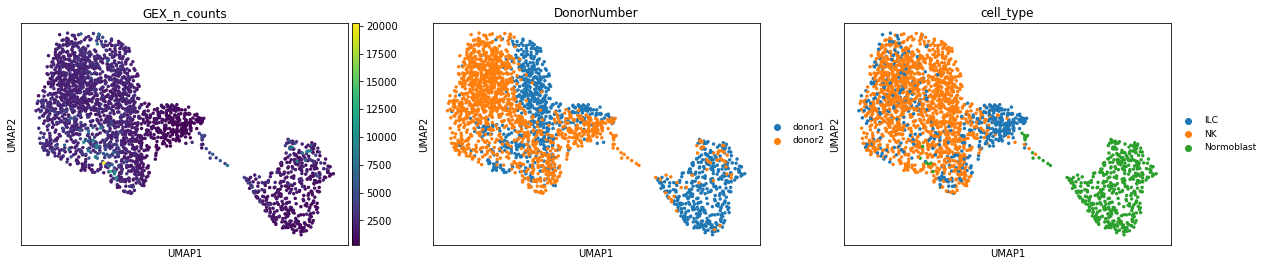

In [7]:
sc.pp.normalize_total(gex)
sc.pp.log1p(gex)
sc.tl.pca(gex)
sc.pp.neighbors(gex)
sc.tl.umap(gex)
plt.figure(figsize=(15,3))
sc.pl.umap(gex, color=["GEX_n_counts", "DonorNumber", "cell_type"], legend_fontsize=9)
plt.show()

After the preprocessing, each cell-type makes a clearer group. However, we can still see batch effects from different donors in ILC and NK cells. 

We apply same preprocessing schemes to ATAC-seq data. 

<Figure size 1080x216 with 0 Axes>

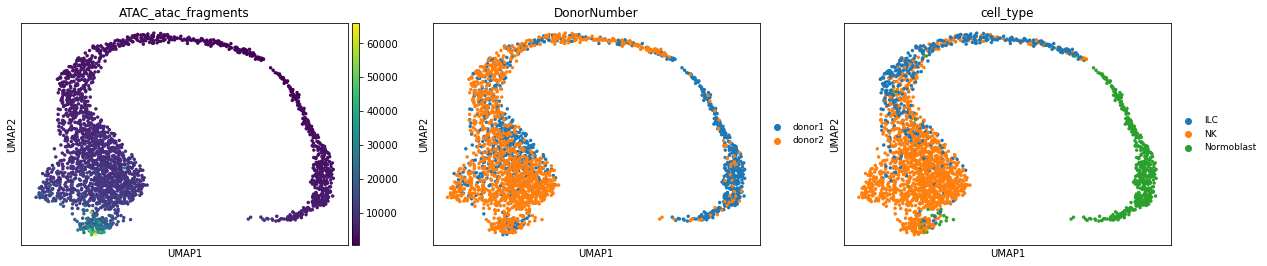

In [8]:
sc.tl.pca(atac)
sc.pp.neighbors(atac)
sc.tl.umap(atac)
plt.figure(figsize=(15,3))
sc.pl.umap(atac, color=["ATAC_atac_fragments", "DonorNumber", "cell_type"], legend_fontsize=9)
plt.show()

In [9]:
sc.pp.normalize_total(atac)
sc.pp.log1p(atac)

<Figure size 1080x216 with 0 Axes>

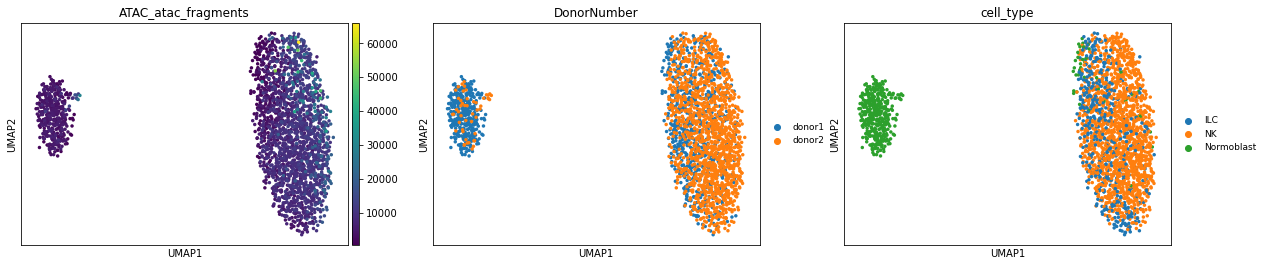

In [10]:
sc.tl.pca(atac)
sc.pp.neighbors(atac)
sc.tl.umap(atac)
plt.figure(figsize=(15,3))
sc.pl.umap(atac, color=["ATAC_atac_fragments", "DonorNumber", "cell_type"], legend_fontsize=9)
plt.show()

Again, after the preprocesing, cell-type heterogenity is shown better but the batch effect still exists.

### Save preprocessed assays into .hdf5 files

_anndata_ object supports _write_ function to save itself into a file.

In [15]:
gex.write("../data/GSE194122/gex_preprocessed.hdf5")
atac.write("../data/GSE194122/atac_preprocessed.hdf5")